In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_train_nan = pd.read_csv('/content/drive/MyDrive/train_nan.csv', header=None)
df_train_nan.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1.0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,...,NaN,NaN,0.362068,0.092083,-0.081268,-0.212573,NaN,-0.664392,-1.073796,-1.564343
1,1.0,0.804855,NaN,0.373474,0.038343,NaN,-0.740860,NaN,-1.395357,-1.570192,...,0.386403,0.049213,-0.258138,NaN,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086
2,-1.0,0.727985,NaN,-0.499124,-1.068629,-1.578351,-1.990534,NaN,-2.503403,-2.585211,...,0.394463,0.463685,NaN,0.517174,NaN,0.476270,0.438513,0.394463,NaN,0.255391
3,-1.0,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,...,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736
4,-1.0,NaN,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,NaN,...,0.776188,0.725496,NaN,0.731967,0.808545,0.839823,NaN,0.437520,NaN,-0.602213


In [ ]:
df_train_nan_mask = df_train_nan.isna()
df_train_nan_mask.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,True,False,False,False
1,False,False,True,False,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,True,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,True,False


In [ ]:
df_train_nan_mask = df_train_nan_mask.to_numpy()
print(df_train_nan_mask[0])

[False False False False False False False False False False False False
 False False False  True  True False False  True False False False  True
 False False False  True False False False False False False False False
  True False  True False False False False False False False False False
 False False False False False False False False  True False False False
  True False False  True False  True  True False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False  True False False  True False
  True False False False False False False False False False False  True
 False False False False  True False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False  True False  True False
 False False False False False  True False False Fa

In [ ]:
df_train_nan_mask = df_train_nan_mask*1.0
print(df_train_nan_mask[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
df_train_nan_mask = df_train_nan_mask[:, 1:]
print(df_train_nan_mask.shape)

(3601, 500)


In [ ]:
df_train_nan = df_train_nan.fillna(1000)
df_train_nan.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1.0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,...,1000.000000,1000.000000,0.362068,0.092083,-0.081268,-0.212573,1000.000000,-0.664392,-1.073796,-1.564343
1,1.0,0.804855,1000.000000,0.373474,0.038343,1000.000000,-0.740860,1000.000000,-1.395357,-1.570192,...,0.386403,0.049213,-0.258138,1000.000000,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086
2,-1.0,0.727985,1000.000000,-0.499124,-1.068629,-1.578351,-1.990534,1000.000000,-2.503403,-2.585211,...,0.394463,0.463685,1000.000000,0.517174,1000.000000,0.476270,0.438513,0.394463,1000.000000,0.255391
3,-1.0,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,...,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736
4,-1.0,1000.000000,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1000.000000,...,0.776188,0.725496,1000.000000,0.731967,0.808545,0.839823,1000.000000,0.437520,1000.000000,-0.602213


In [ ]:
df_train_nan = df_train_nan.to_numpy()
x_train_nan = df_train_nan[:, 1:]

In [ ]:
x_train_nan = x_train_nan.reshape((x_train_nan.shape[0], x_train_nan.shape[1], 1))
print(x_train_nan.shape)

(3601, 500, 1)


In [ ]:
df_train_nan_mask = df_train_nan_mask.reshape((df_train_nan_mask.shape[0], df_train_nan_mask.shape[1], 1))
print(df_train_nan_mask.shape)

(3601, 500, 1)


In [ ]:
x_train_input = np.concatenate([x_train_nan, df_train_nan_mask], axis=2)
print(x_train_input.shape)

(3601, 500, 2)


In [ ]:
print(x_train_input[0, :50, 0])

[-7.9717168e-01 -6.6439208e-01 -3.7301463e-01  4.0815121e-02
  5.2693599e-01  9.8428794e-01  1.3531202e+00  1.5781078e+00
  1.6592509e+00  1.6408093e+00  1.5522896e+00  1.4379516e+00
  1.2793537e+00  1.0691193e+00  1.0000000e+03  1.0000000e+03
 -3.0072351e-01 -9.3732792e-01  1.0000000e+03 -1.9516165e+00
 -2.1360326e+00 -2.0401363e+00  1.0000000e+03 -1.2619003e+00
 -8.0454833e-01 -4.6153436e-01  1.0000000e+03 -2.5130000e-01
 -3.0183001e-01 -3.1326381e-01 -2.0445830e-01  6.7002208e-02
  4.7161115e-01  9.3265143e-01  1.3531202e+00  1.0000000e+03
  1.7588356e+00  1.0000000e+03  1.4822114e+00  1.1797690e+00
  8.2569008e-01  4.4948122e-01  7.2534692e-02 -2.9703519e-01
 -6.4595047e-01 -9.7421115e-01 -1.2508353e+00 -1.4094332e+00
 -1.4278748e+00 -1.3024718e+00]


In [ ]:
print(x_train_input[0, :50, 1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [ ]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)

x_train_target, _ = readucr("/content/drive/MyDrive/FordA_TRAIN.tsv")
x_train_target = x_train_target.reshape((x_train_target.shape[0], x_train_target.shape[1], 1))
print(x_train_target.shape)

(3601, 500, 1)


In [ ]:
print(x_train_input[0,:50,0])

[-7.9717168e-01 -6.6439208e-01 -3.7301463e-01  4.0815121e-02
  5.2693599e-01  9.8428794e-01  1.3531202e+00  1.5781078e+00
  1.6592509e+00  1.6408093e+00  1.5522896e+00  1.4379516e+00
  1.2793537e+00  1.0691193e+00  1.0000000e+03  1.0000000e+03
 -3.0072351e-01 -9.3732792e-01  1.0000000e+03 -1.9516165e+00
 -2.1360326e+00 -2.0401363e+00  1.0000000e+03 -1.2619003e+00
 -8.0454833e-01 -4.6153436e-01  1.0000000e+03 -2.5130000e-01
 -3.0183001e-01 -3.1326381e-01 -2.0445830e-01  6.7002208e-02
  4.7161115e-01  9.3265143e-01  1.3531202e+00  1.0000000e+03
  1.7588356e+00  1.0000000e+03  1.4822114e+00  1.1797690e+00
  8.2569008e-01  4.4948122e-01  7.2534692e-02 -2.9703519e-01
 -6.4595047e-01 -9.7421115e-01 -1.2508353e+00 -1.4094332e+00
 -1.4278748e+00 -1.3024718e+00]


In [ ]:
print(x_train_target[0,:50,0])

[-0.79717168 -0.66439208 -0.37301463  0.04081512  0.52693599  0.98428794
  1.3531202   1.5781078   1.6592509   1.6408093   1.5522896   1.4379516
  1.2793537   1.0691193   0.744547    0.27760541 -0.30072351 -0.93732792
 -1.5200828  -1.9516165  -2.1360326  -2.0401363  -1.7229406  -1.2619003
 -0.80454833 -0.46153436 -0.27822475 -0.2513     -0.30183001 -0.31326381
 -0.2044583   0.06700221  0.47161115  0.93265143  1.3531202   1.6444976
  1.7588356   1.6961341   1.4822114   1.179769    0.82569008  0.44948122
  0.07253469 -0.29703519 -0.64595047 -0.97421115 -1.2508353  -1.4094332
 -1.4278748  -1.3024718 ]


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train_input, x_train_target)).batch(32)
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
for x_nan, x_target in train_ds:
  print(x_nan.shape)
  print(x_target.shape)
  break

(32, 500, 2)
(32, 500, 1)


## Build a model

In [ ]:
input_layer = keras.layers.Input((500, 2))

origin = input_layer[:,:,0]
condition = tf.cast(input_layer[:,:,1], dtype=tf.bool)

x = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)

x = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.PReLU()(x)

x = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.PReLU()(x)

x = keras.layers.Conv1D(filters=1, kernel_size=3, padding="same")(x)
x = keras.layers.Flatten()(x)

x = tf.where(condition, x, origin)

model_fill = keras.models.Model(inputs=input_layer, outputs=x)
model_fill.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 500, 2)]     0           []                               
                                                                                                  
 conv1d_24 (Conv1D)             (None, 500, 64)      448         ['input_8[0][0]']                
                                                                                                  
 batch_normalization_18 (BatchN  (None, 500, 64)     256         ['conv1d_24[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 re_lu_6 (ReLU)                 (None, 500, 64)      0           ['batch_normalization_18[0]

## Train the model

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="loss", factor=0.5, patience=20, min_lr=0.0001),
]
model_fill.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mse"],
)
history = model_fill.fit(train_ds,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/500
113/113 [==============================] - 7s 9ms/step - loss: 0.1625 - mse: 0.1625 - lr: 0.0010
Epoch 2/500
113/113 [==============================] - 1s 8ms/step - loss: 0.1479 - mse: 0.1479 - lr: 0.0010
Epoch 3/500
113/113 [==============================] - 1s 8ms/step - loss: 0.1365 - mse: 0.1365 - lr: 0.0010
Epoch 4/500
113/113 [==============================] - 1s 8ms/step - loss: 0.0990 - mse: 0.0990 - lr: 0.0010
Epoch 5/500
113/113 [==============================] - 1s 8ms/step - loss: 0.0692 - mse: 0.0692 - lr: 0.0010
Epoch 6/500
113/113 [==============================] - 1s 8ms/step - loss: 0.0529 - mse: 0.0529 - lr: 0.0010
Epoch 7/500
113/113 [==============================] - 1s 8ms/step - loss: 0.0428 - mse: 0.0428 - lr: 0.0010
Epoch 8/500
113/113 [==============================] - 1s 8ms/step - loss: 0.0409 - mse: 0.0409 - lr: 0.0010
Epoch 9/500
113/113 [==============================] - 1s 7ms/step - loss: 0.0330 - mse: 0.0330 - lr: 0.0010
Epoch 10/500
113/11

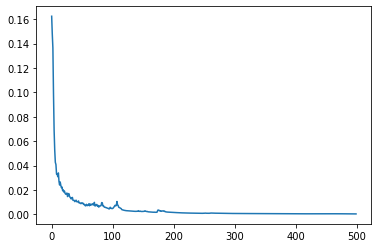

In [ ]:
metric = "mse"
plt.plot(history.history[metric])
plt.show()

In [ ]:
df_train_nan = pd.read_csv('/content/drive/MyDrive/train_nan.csv', header=None)
df_test_nan = pd.read_csv('/content/drive/MyDrive/test_nan.csv', header=None)

df_train_nan_mask = df_train_nan.isna().to_numpy()*1.0
df_train_nan_mask = df_train_nan_mask[:, 1:]

df_test_nan_mask = df_test_nan.isna().to_numpy()*1.0
df_test_nan_mask = df_test_nan_mask[:, 1:]

df_train_nan = df_train_nan.fillna(1000)
df_test_nan  = df_test_nan.fillna(1000)

In [ ]:
df_train_nan = df_train_nan.to_numpy()
y_train = df_train_nan[:, 0]
x_train = df_train_nan[:, 1:]
y_train = y_train.astype(int)

In [ ]:
df_test_nan = df_test_nan.to_numpy()
y_test = df_test_nan[:, 0]
x_test = df_test_nan[:, 1:]
y_test = y_test.astype(int)

In [ ]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [ ]:
print(x_train.shape)
print(df_train_nan_mask.shape)

(3601, 500, 1)
(3601, 500)


In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
df_train_nan_mask = df_train_nan_mask.reshape((df_train_nan_mask.shape[0], df_train_nan_mask.shape[1], 1))

x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
df_test_nan_mask = df_test_nan_mask.reshape((df_test_nan_mask.shape[0], df_test_nan_mask.shape[1], 1))

In [ ]:
x_train = np.concatenate([x_train, df_train_nan_mask], axis=2)
x_test  = np.concatenate([x_test, df_test_nan_mask], axis=2)

print(x_train.shape)
print(x_test.shape)

(3601, 500, 2)
(1320, 500, 2)


In [ ]:
x_train_fill = model_fill(x_train, training=False).numpy()
x_test_fill  = model_fill(x_test, training=False).numpy()

print(x_train_fill.shape)
print(x_test_fill.shape)

(3601, 500)
(1320, 500)


In [ ]:
data_train = np.concatenate([y_train.reshape(3601, 1), x_train_fill], axis=1)
print(data_train.shape)

(3601, 501)


In [ ]:
np.savetxt("/content/drive/MyDrive/train_filled.csv", data_train, delimiter=",")

In [ ]:
data_test = np.concatenate([y_test.reshape(1320, 1), x_test_fill], axis=1)
np.savetxt("/content/drive/MyDrive/test_filled.csv", data_test, delimiter=",")

In [ ]:
print(x_train[0,:17,0])

[-7.9717168e-01 -6.6439208e-01 -3.7301463e-01  4.0815121e-02
  5.2693599e-01  9.8428794e-01  1.3531202e+00  1.5781078e+00
  1.6592509e+00  1.6408093e+00  1.5522896e+00  1.4379516e+00
  1.2793537e+00  1.0691193e+00  1.0000000e+03  1.0000000e+03
 -3.0072351e-01]


In [ ]:
print(x_train_fill[0,:17])

[-0.79717165 -0.66439205 -0.37301463  0.04081512  0.526936    0.9842879
  1.3531202   1.5781078   1.6592509   1.6408093   1.5522896   1.4379516
  1.2793537   1.0691193   0.51193243  0.07317767 -0.30072352]


In [ ]:
idx = np.random.permutation(len(x_train_fill))
x_train_fill = x_train_fill[idx]
y_train = y_train[idx]

In [ ]:
x_train_fill = x_train_fill.reshape((x_train_fill.shape[0], x_train_fill.shape[1], 1))
x_test_fill  = x_test_fill.reshape((x_test_fill.shape[0], x_test_fill.shape[1], 1))

print(x_train_fill.shape)
print(x_test_fill.shape)

(3601, 500, 1)
(1320, 500, 1)


In [ ]:
train_ds_c = tf.data.Dataset.from_tensor_slices((x_train_fill, y_train)).batch(32)
train_ds_c = train_ds_c.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
for x,y in train_ds_c:
  print(x.shape)
  print(y.shape)
  break

(32, 500, 2)
(32, 500, 1)


In [ ]:
# Build a model

input_layer = keras.layers.Input((500, 1))

x = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)

x = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)

x = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)

x = keras.layers.GlobalAveragePooling1D()(x)
x = keras.layers.Dense(2, activation="softmax")(x)

model_c = keras.models.Model(inputs=input_layer, outputs=x)
model_c.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 500, 1)]          0         
                                                                 
 conv1d_34 (Conv1D)          (None, 500, 64)           256       
                                                                 
 batch_normalization_27 (Bat  (None, 500, 64)          256       
 chNormalization)                                                
                                                                 
 re_lu_13 (ReLU)             (None, 500, 64)           0         
                                                                 
 conv1d_35 (Conv1D)          (None, 500, 64)           12352     
                                                                 
 batch_normalization_28 (Bat  (None, 500, 64)          256       
 chNormalization)                                          

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
]
model_c.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model_c.fit(
    x_train_fill, y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_test_fill, y_test),
    verbose=1,
)

Epoch 1/500
113/113 [==============================] - 4s 11ms/step - loss: 0.6972 - sparse_categorical_accuracy: 0.5054 - val_loss: 0.6944 - val_sparse_categorical_accuracy: 0.5159 - lr: 0.0010
Epoch 2/500
113/113 [==============================] - 1s 8ms/step - loss: 0.6952 - sparse_categorical_accuracy: 0.5057 - val_loss: 0.6926 - val_sparse_categorical_accuracy: 0.5159 - lr: 0.0010
Epoch 3/500
113/113 [==============================] - 1s 8ms/step - loss: 0.6934 - sparse_categorical_accuracy: 0.5057 - val_loss: 0.7186 - val_sparse_categorical_accuracy: 0.5159 - lr: 0.0010
Epoch 4/500
113/113 [==============================] - 1s 8ms/step - loss: 0.6962 - sparse_categorical_accuracy: 0.5096 - val_loss: 0.6925 - val_sparse_categorical_accuracy: 0.4879 - lr: 0.0010
Epoch 5/500
113/113 [==============================] - 1s 8ms/step - loss: 0.6934 - sparse_categorical_accuracy: 0.5018 - val_loss: 0.6907 - val_sparse_categorical_accuracy: 0.5636 - lr: 0.0010
Epoch 6/500
113/113 [========

KeyboardInterrupt: ignored